In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import imblearn

In [2]:
df = pd.read_csv('Insurance_Data.csv')

In [3]:
df.isna().sum()

Age                       92
Gender                     0
MaritalStatus            142
SmokerStatus              66
LifeStyle                  0
LanguageSpoken             0
HighestEducation           0
Race                     115
Nationality              145
MalaysiaPR                 0
MovingToNewCompany         0
Occupation               145
Telco                      0
HomeAddress               79
ResidentialType            0
NoOfDependent             94
FamilyExpenses(month)    121
AnnualSalary             156
Customer_Needs_1           0
Customer_Needs_2           0
PurchasedPlan1             0
Transport                  0
PurchasedPlan2             0
MedicalComplication        0
dtype: int64

In [4]:
df1 = df.copy()

In [5]:
df1['Age'].mean()

30.776960784313726

In [6]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

df1['NoOfDependent'] = df1['NoOfDependent'].fillna(df1['NoOfDependent'].mean()+1)
df1['NoOfDependent'].round(0).astype(int)

df1['FamilyExpenses(month)'] = df1['FamilyExpenses(month)'].fillna(df1['FamilyExpenses(month)'].mean())
df1['AnnualSalary'] = df1['AnnualSalary'].fillna(df1['AnnualSalary'].mean())
df1.head()

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,NaN,home,english,Bachelor,malay,NaN,yes,...,terrace,2.000000,10242.000000,118087.540698,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,NaN,NaN,outdoor,malay,Diploma,chinese,Malaysian,no,...,terrace,2.000000,6335.403694,73926.000000,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,NaN,frequent,pub_goer,english,Bachelor,others,NaN,no,...,condominium,2.000000,4316.000000,140734.000000,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,NaN,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,...,terrace,3.337438,4845.000000,118087.540698,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,NaN,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,...,condominium,2.000000,9883.000000,98833.000000,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes


In [7]:
df1['MaritalStatus'] = df1['MaritalStatus'].fillna('Unspecified Status')

df1['SmokerStatus'] = df1['SmokerStatus'].fillna('Unknown')

df1['Race'] = df1['Race'].fillna('Not Specified')

df1['Nationality'] = df1['Nationality'].fillna('Unspecified')

df1['Occupation'] = df1['Occupation'].fillna('Not available')

df1['HomeAddress'] = df1['HomeAddress'].fillna('Not Stated')

In [8]:
df1.isna().sum()

Age                      0
Gender                   0
MaritalStatus            0
SmokerStatus             0
LifeStyle                0
LanguageSpoken           0
HighestEducation         0
Race                     0
Nationality              0
MalaysiaPR               0
MovingToNewCompany       0
Occupation               0
Telco                    0
HomeAddress              0
ResidentialType          0
NoOfDependent            0
FamilyExpenses(month)    0
AnnualSalary             0
Customer_Needs_1         0
Customer_Needs_2         0
PurchasedPlan1           0
Transport                0
PurchasedPlan2           0
MedicalComplication      0
dtype: int64

In [9]:
df2=df1.copy()

In [10]:
#treat imbalance data
from sklearn.preprocessing import MinMaxScaler 

features_to_scale = ["Age", "NoOfDependent", "FamilyExpenses(month)", "AnnualSalary"]
to_scale = df1[features_to_scale]

a=MinMaxScaler()
b=a.fit_transform(to_scale)
c=pd.DataFrame(b, columns=features_to_scale)

SchoolAgain    294
COVIDFree      110
HomeSafe        96
Name: PurchasedPlan1, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

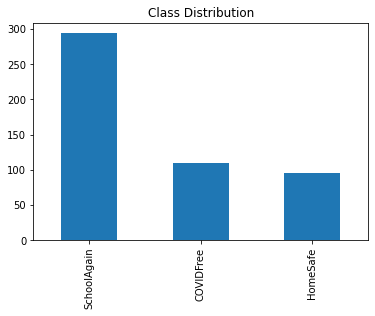

In [11]:
print(df1["PurchasedPlan1"].value_counts())
df1["PurchasedPlan1"].value_counts().plot(kind="bar")
plt.title("Class Distribution")

XEdu           189
KidsFlyUp      157
NoMoneyDown    154
Name: PurchasedPlan2, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

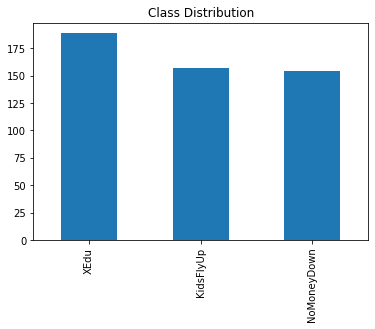

In [12]:
print(df1["PurchasedPlan2"].value_counts())
df1["PurchasedPlan2"].value_counts().plot(kind="bar")
plt.title("Class Distribution")

In [13]:
df3 = df1.copy()

In [14]:
#Mapping

df1["PurchasedPlan1"]    = df1["PurchasedPlan1"].map({'SchoolAgain':1,'HomeSafe':2,'COVIDFree':3})
df1["PurchasedPlan2"]    = df1["PurchasedPlan2"].map({'NoMoneyDown':1,'XEdu':2,'KidsFlyUp':3})
df1["Gender"]            = df1["Gender"].map({'female':1,'male':2})
df1["MaritalStatus"]     = df1["MaritalStatus"].map({'single':1,'Unspecified Status':2,'married':3})
df1["SmokerStatus"]      = df1["SmokerStatus"].map({'Unknown':1,'frequent':2,'once_in_a_while':3, 'sometimes':4})
df1["LifeStyle"]         = df1["LifeStyle"].map({'home':1,'outdoor':2,'pub_goer':3})
df1["LanguageSpoken"]    = df1["LanguageSpoken"].map({'english':1,'malay':2,'mandarin':3})
df1["HighestEducation"]  = df1["HighestEducation"].map({'Bachelor':1,'Diploma':2,'Master':3, 'PhD':4})
df1["Race"]              = df1["Race"].map({'malay':1,'chinese':2,'others':3, 'Not Specified':4, 'indian':5})
df1["Nationality"]       = df1["Nationality"].map({'Unspecified':1,'Malaysian':2,'others':3})
df1["MalaysiaPR"]        = df1["MalaysiaPR"].map({'yes':1,'no':2})
df1["MovingToNewCompany"]= df1["MovingToNewCompany"].map({'yes':1,'no':2})
df1["Occupation"]        = df1["Occupation"].map({'employer':1,'selfEmployed':2, 'privateEemployee':3, 'Not available':4, 'govServant':5})
df1["Telco"]             = df1["Telco"].map({'maxis':1,'umobile':2, 'celcom':3, 'digi':4})
df1["HomeAddress"]       = df1["HomeAddress"].map({'north_mal':1,'east_mal':2, 'central_mal':3, 'south_mal':4, 'Not Stated':5})
df1["ResidentialType"]   = df1["ResidentialType"].map({'terrace':1,'condominium':2, 'flat':3, 'bungalow':4})
df1["Customer_Needs_1"]  = df1["Customer_Needs_1"].map({'PersonalSaving':1,'PersonalRetirement':2, 'PersonalMedical':3})
df1["Customer_Needs_2"]  = df1["Customer_Needs_2"].map({'KidMedical':1,'KidSaving':2, 'KidEducation':3})
df1["Transport"]         = df1["Transport"].map({'driving':1,'publicTransport':2})
df1["MedicalComplication"] = df1["MedicalComplication"].map({'no':1,'yes':2})


# Treat imbalanced data
Treat imbalanced data for PurchasedPlan1 and PurchasedPlan2 respectively.

In [15]:
df3 = df1.copy()

In [16]:
smt = imblearn.over_sampling.SMOTE(sampling_strategy="auto", random_state=0, k_neighbors=3)

X = df3.drop(["PurchasedPlan1"], 1)
y = df3["PurchasedPlan1"]
features = X.columns

a = MinMaxScaler()
x_scaled = a.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns = features)

X_res, y_res = smt.fit_resample(X,y)

In [17]:
print("PurchasedPlan2 Skewness: ", X_res["PurchasedPlan2"].skew())

PurchasedPlan2 Skewness:  0.21232008797040294


In [18]:
X1 = X_res
y1 = y_res

3    294
2    294
1    294
Name: PurchasedPlan1, dtype: int64


Text(0.5, 1.0, 'Purchased Plan 1')

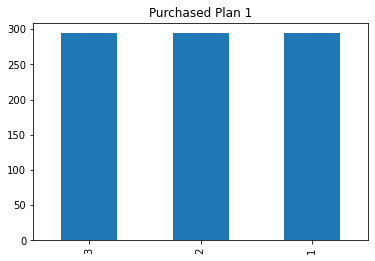

In [19]:
print(y1.value_counts())
y1.value_counts().plot(kind="bar")
plt.title("Purchased Plan 1")

In [20]:
X = df3.drop(["PurchasedPlan2"], 1)
y = df3["PurchasedPlan2"]
features = X.columns

a = MinMaxScaler()
x_scaled = a.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns = features)

X_res, y_res = smt.fit_resample(X,y)


In [21]:
print("PurchasedPlan1 Skewness: ", X_res["PurchasedPlan1"].skew())

PurchasedPlan1 Skewness:  0.862690466525261


In [22]:
X2 = X_res
y2 = y_res

3    189
2    189
1    189
Name: PurchasedPlan2, dtype: int64


Text(0.5, 1.0, 'Purchased Plan 2')

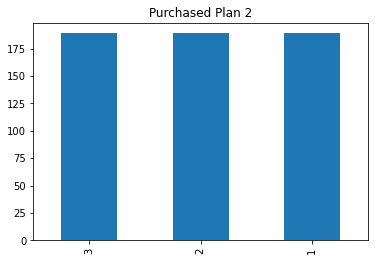

In [23]:
print(y2.value_counts())
y2.value_counts().plot(kind="bar")
plt.title("Purchased Plan 2")

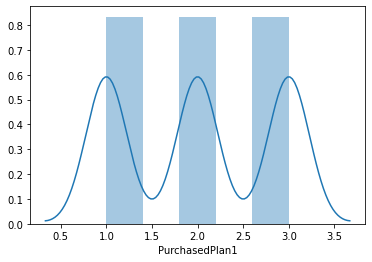

In [24]:
sns.distplot(y1)

# Exploratory Data Analysis

To identify imporatant factors in data and understand the relationship.

In [25]:
df3 = df1.copy()

## Question 1: Which age group is the most potential customer?

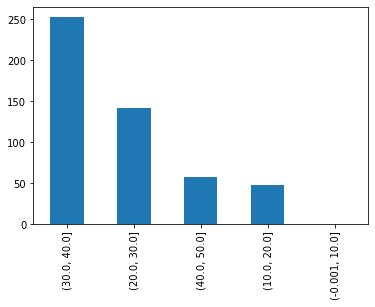

In [26]:
# your codes here...
bin_s = [0,10,20,30,40,50]
count_s = df2['Age'].value_counts(bins=bin_s)
count_s.plot(kind = "bar")

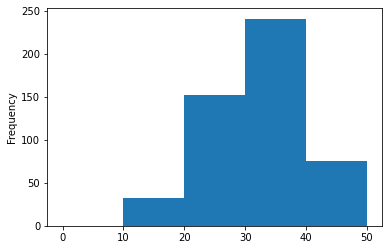

In [27]:
df2['Age'].plot(kind = "hist", bins = bin_s)

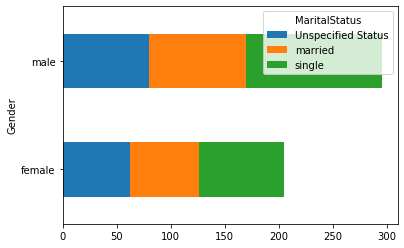

In [28]:
df2.groupby(['Gender', 'MaritalStatus']).size().unstack().plot(kind='barh', stacked=True)

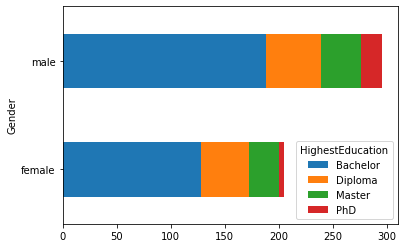

In [29]:
df2.groupby(['Gender', 'HighestEducation']).size().unstack().plot(kind='barh', stacked=True)

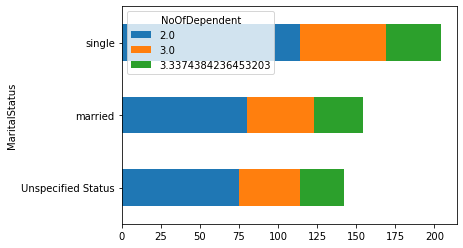

In [30]:
df2.groupby(['MaritalStatus', 'NoOfDependent']).size().unstack().plot(kind='barh', stacked=True)

# Question : Health problem is one of the factors customer tend to buy the insurance.

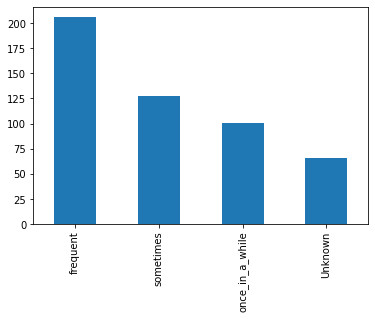

In [31]:
#df2['SmokerStatus'].plot(kind = "hist")
smoke = df2['SmokerStatus'].value_counts()
smoke.plot(kind = "bar")

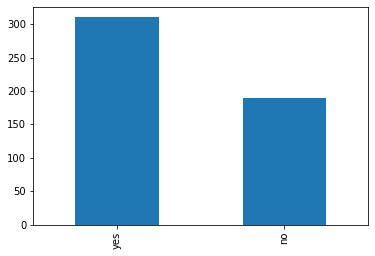

In [32]:
medical = df2['MedicalComplication'].value_counts()
medical.plot(kind = "bar")

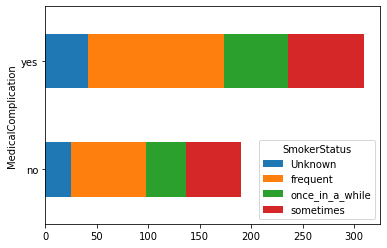

In [33]:
df2.groupby(['MedicalComplication', 'SmokerStatus']).size().unstack().plot(kind='barh', stacked=True)

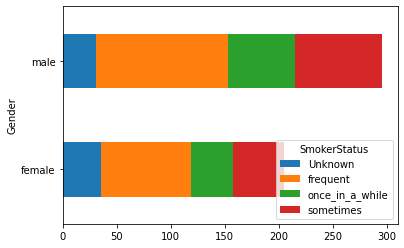

In [34]:
df2.groupby(['Gender', 'SmokerStatus']).size().unstack().plot(kind='barh', stacked=True)

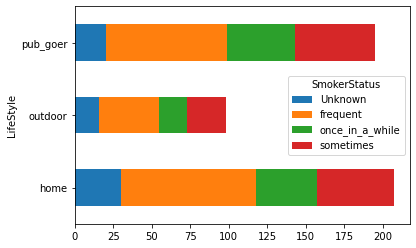

In [35]:
df2.groupby(['LifeStyle', 'SmokerStatus']).size().unstack().plot(kind='barh', stacked=True)

## Question : Any correlation between the lifestyle factors such as occupation, race with their education background.

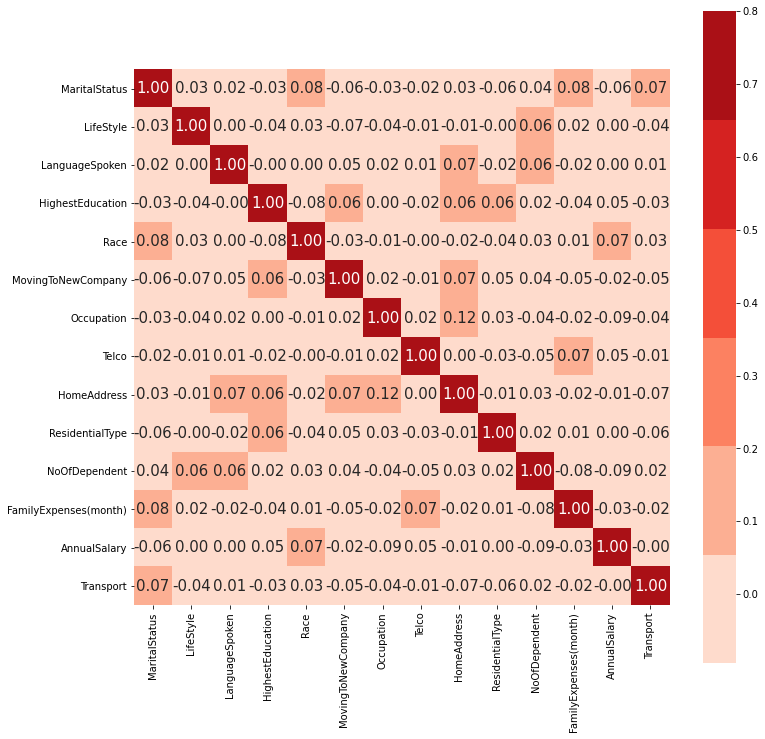

In [36]:
features = ["MaritalStatus", "LifeStyle", "LanguageSpoken",
            "HighestEducation", "Race", "MovingToNewCompany", "Occupation", "Telco", 
            "HomeAddress", "ResidentialType", "NoOfDependent", "FamilyExpenses(month)", 
            "AnnualSalary","Transport"]

factor = df1[features]

corr = factor.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax=.8, square=True, annot=True, fmt= '.2f',
            annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

# Feature Selection

### BORUTA

In [37]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [38]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

In [39]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### PurchasedPlan1

In [40]:
X = pd.get_dummies(X1, drop_first=True)
feat_selector.fit(X.values,y1.values.ravel())
colnames = X.columns

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [41]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
0,Age,1.00
15,NoOfDependent,1.00
17,AnnualSalary,1.00
16,FamilyExpenses(month),1.00
11,Occupation,1.00
3,SmokerStatus,1.00
22,MedicalComplication,0.94
19,Customer_Needs_2,0.88
14,ResidentialType,0.82
2,MaritalStatus,0.76


---------Bottom 10----------


,Features,Score
12,Telco,0.53
5,LanguageSpoken,0.47
21,PurchasedPlan2,0.41
8,Nationality,0.35
4,LifeStyle,0.29
13,HomeAddress,0.24
20,Transport,0.18
6,HighestEducation,0.12
9,MalaysiaPR,0.06
1,Gender,0.00


### PurchasedPlan2

In [42]:
X = pd.get_dummies(X2, drop_first=True)
feat_selector.fit(X.values,y2.values.ravel())
colnames = X.columns

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [43]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
17,AnnualSalary,1.00
16,FamilyExpenses(month),1.00
0,Age,0.95
12,Telco,0.90
6,HighestEducation,0.86
5,LanguageSpoken,0.81
7,Race,0.76
18,Customer_Needs_1,0.71
14,ResidentialType,0.67
11,Occupation,0.67


---------Bottom 10----------


,Features,Score
20,PurchasedPlan1,0.43
4,LifeStyle,0.38
8,Nationality,0.33
2,MaritalStatus,0.29
19,Customer_Needs_2,0.24
10,MovingToNewCompany,0.19
9,MalaysiaPR,0.14
21,Transport,0.14
1,Gender,0.05
22,MedicalComplication,0.00


Text(0.5, 1.0, 'PurchasedPlan 2 Boruta Top 30 Features')

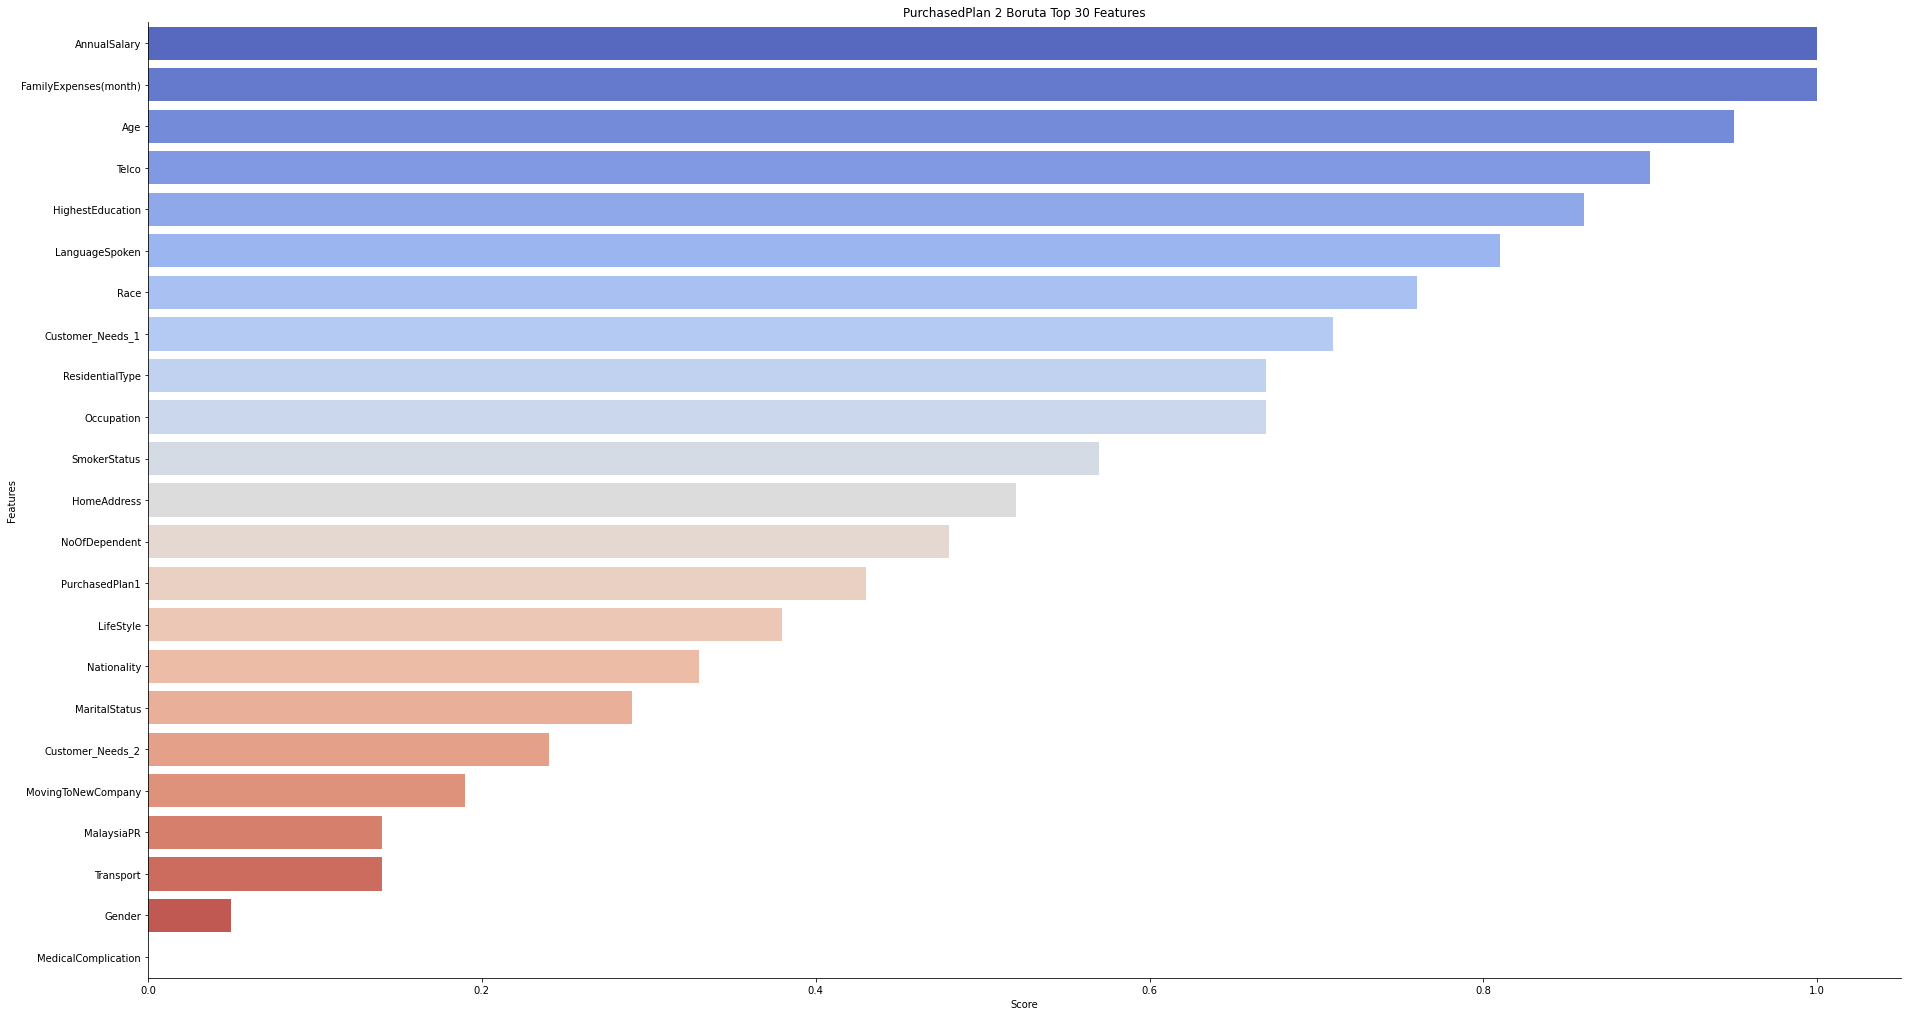

In [44]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:30], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("PurchasedPlan 2 Boruta Top 30 Features")

# Classification

In [45]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix


from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB

In [46]:
from sklearn import metrics
from sklearn import tree

## Split train-test dataset

In [47]:
df3 = df1.copy()

In [48]:
df1.head()

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,1,1,1,1,1,1,1,1,1,...,1,2.000000,10242.000000,118087.540698,1,1,1,1,1,1
1,25.0,2,2,1,2,2,2,2,2,2,...,1,2.000000,6335.403694,73926.000000,2,1,1,1,2,2
2,27.0,2,2,2,3,1,1,3,1,2,...,2,2.000000,4316.000000,140734.000000,3,1,1,1,3,2
3,33.0,1,2,3,3,1,1,1,2,1,...,1,3.337438,4845.000000,118087.540698,1,2,1,1,1,1
4,28.0,1,2,3,1,1,1,2,2,1,...,2,2.000000,9883.000000,98833.000000,2,3,3,1,3,2


In [49]:
df2.head()

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,Unknown,home,english,Bachelor,malay,Unspecified,yes,...,terrace,2.000000,10242.000000,118087.540698,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,Unspecified Status,Unknown,outdoor,malay,Diploma,chinese,Malaysian,no,...,terrace,2.000000,6335.403694,73926.000000,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,Unspecified Status,frequent,pub_goer,english,Bachelor,others,Unspecified,no,...,condominium,2.000000,4316.000000,140734.000000,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,Unspecified Status,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,...,terrace,3.337438,4845.000000,118087.540698,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,Unspecified Status,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,...,condominium,2.000000,9883.000000,98833.000000,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes


### Naive Bayes

In [50]:
nb = GaussianNB()

#### PurchasePlan1

In [51]:
#df_X = df1.drop(['PurchasedPlan1','PurchasedPlan2'], axis=1)

#X = pd.get_dummies(df_X, drop_first=True)
#y1 = df2['PurchasedPlan1']
#y2 = df2['PurchasedPlan2']

X = pd.get_dummies(X1, drop_first=True)


In [52]:
# PurchasedPlan1
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.2, random_state=10)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Model Accuracy

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.519
Accuracy on test set: 0.514


In [53]:
confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')


print('Precision= {:.2f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[14 21 20]
 [ 9 45 12]
 [ 9 15 32]]
**********************
Mjority TN=  14
Mjority FP= 21
Mjority FN=  9
Mjority TP=  45
**********************
Precision= 0.50
Recall= 0.50
F1= 0.49
Accuracy= 0.51


In [54]:
# Calculate AUC

# your codes here...
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

In [55]:
prob_NB

array([0.36309648, 0.42913209, 0.23687223, 0.34617862, 0.43432537,
       0.32045214, 0.24021782, 0.46622471, 0.20609152, 0.24438199,
       0.47780927, 0.40804083, 0.3935757 , 0.58008937, 0.44851183,
       0.29396744, 0.19532765, 0.40183609, 0.45946915, 0.42287153,
       0.28093539, 0.5271019 , 0.32835864, 0.41965056, 0.48871233,
       0.41368084, 0.19641141, 0.52620178, 0.50435085, 0.45781018,
       0.42851325, 0.45442997, 0.33651259, 0.17542308, 0.334237  ,
       0.32868521, 0.19730469, 0.37597198, 0.17251055, 0.12109517,
       0.38608289, 0.15024991, 0.20783048, 0.49440008, 0.13141133,
       0.37914344, 0.47311773, 0.3665634 , 0.2559108 , 0.20489738,
       0.22817635, 0.30009416, 0.39763605, 0.16095188, 0.3895206 ,
       0.45616708, 0.18234785, 0.19189126, 0.19323013, 0.39007004,
       0.26885556, 0.17186629, 0.2366541 , 0.51930572, 0.56356018,
       0.42905797, 0.4510559 , 0.30742244, 0.45650769, 0.54621279,
       0.42624259, 0.55454247, 0.25693681, 0.63835957, 0.19382

In [56]:
# Calculate AUC

# your codes here...
#prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

#auc_NB= roc_auc_score(y_test, prob_NB, multi_class="ovr", average="macro")
#print('AUC: %.2f' % auc_NB)

AxisError: axis 1 is out of bounds for array of dimension 1

#### PurchasePlan2

In [57]:
X = pd.get_dummies(X2, drop_first=True)

In [58]:
#### PurchasedPlan2
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=5)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Model Accuracy

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

print(" ")

confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')


print('Precision= {:.2f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Accuracy on training set: 0.466
Accuracy on test set: 0.421
 
Mjority classifier Confusion Matrix
 [[18 14 17]
 [ 8  7 13]
 [ 8  6 23]]
**********************
Mjority TN=  18
Mjority FP= 14
Mjority FN=  8
Mjority TP=  7
**********************
Precision= 0.41
Recall= 0.41
F1= 0.40
Accuracy= 0.42


In [59]:
""""""
roc = {label: [] for label in multi_class_series.unique()}
for label in multi_class_series.unique():
    selected_classifier.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(test_class, predictions_proba[:,1])
    
""""""


NameError: name 'multi_class_series' is not defined

### Decison Tree Classifier

In [60]:
clf  = DecisionTreeClassifier()

#### PurchasePlan1

In [61]:
# PurchasedPlan1
X = pd.get_dummies(X1, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.4, random_state=10)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

print(" ")

confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')


print('Precision= {:.2f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.535
 
Mjority classifier Confusion Matrix
 [[58 36 28]
 [27 69 26]
 [30 17 62]]
**********************
Mjority TN=  58
Mjority FP= 36
Mjority FN=  27
Mjority TP=  69
**********************
Precision= 0.53
Recall= 0.54
F1= 0.54
Accuracy= 0.54


#### PurchasePlan2

In [62]:
# PurchasedPlan2
X = pd.get_dummies(X2, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y2,test_size=0.4, random_state=10)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

print(" ")

confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')


print('Precision= {:.2f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.374
 
Mjority classifier Confusion Matrix
 [[24 32 23]
 [28 24 26]
 [13 20 37]]
**********************
Mjority TN=  24
Mjority FP= 32
Mjority FN=  28
Mjority TP=  24
**********************
Precision= 0.37
Recall= 0.38
F1= 0.37
Accuracy= 0.37


### Random Forest

In [63]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100, random_state=10)

#### PurchasePlan1

In [64]:
X = pd.get_dummies(X1, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.4, random_state=10)

rf.fit(X, y1)
y_pred = rf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

print(" ")

confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

#fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, prob_DT) 

Accuracy on training set: 0.817
Accuracy on test set: 0.836
 
Mjority classifier Confusion Matrix
 [[107   6   9]
 [ 11 103   8]
 [ 14  10  85]]
**********************
Mjority TN=  107
Mjority FP= 6
Mjority FN=  11
Mjority TP=  103
**********************
Precision= 0.84
Recall= 0.83
F1= 0.83
Accuracy= 0.84


In [65]:
# Calculate AUC
#prob_DT = rf.predict_proba(X_test)
#prob_DT = prob_DT[:,1]
#auc_DT = roc_auc_score(y_test,prob_DT, multi_class='ovo', average='weighted')
#fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prob_DT)
#print("AUC: %.2f" % auc_DT)

#### PurchasePlan2

In [66]:
X = pd.get_dummies(X2, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y2,test_size=0.4, random_state=10)

rf.fit(X, y2)
y_pred = rf.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

print(" ")

confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

#fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, prob_DT) 

Accuracy on training set: 0.841
Accuracy on test set: 0.850
 
Mjority classifier Confusion Matrix
 [[63  7  9]
 [ 2 70  6]
 [ 4  6 60]]
**********************
Mjority TN=  63
Mjority FP= 7
Mjority FN=  2
Mjority TP=  70
**********************
Precision= 0.85
Recall= 0.85
F1= 0.85
Accuracy= 0.85


In [67]:
# Calculate AUC
#prob_DT = rf.predict_proba(X_test)
#prob_DT = prob_DT[:,1]
#auc_DT = roc_auc_score(y_test,prob_DT)
#fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prob_DT)
#print("AUC: %.2f" % auc_DT)

### SVM

In [68]:
from sklearn.svm import SVC
model = SVC(kernel="linear",gamma="auto",probability=True, cache_size=7000)

#### PurchasePlan1

In [69]:
X = pd.get_dummies(X2, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y2,test_size=0.4, random_state=10)

In [70]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [71]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.324
Accuracy on test set: 0.348


In [72]:
confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN = ', confusion_majority[0][0])
print('Mjority FP = ', confusion_majority[0][1])
print('Mjority FN = ', confusion_majority[1][0])
print('Mjority TP = ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

#fpr_model, tpr_model, thresholds_model = roc_curve(y_test, prob_model) 

Mjority classifier Confusion Matrix
 [[27 28 24]
 [27 28 23]
 [18 16 36]]
**********************
Mjority TN =  27
Mjority FP =  28
Mjority FN =  27
Mjority TP =  28
**********************
Precision= 0.40
Recall= 0.41
F1= 0.40
Accuracy= 0.40


#### PurchasePlan2

In [73]:
X = pd.get_dummies(X1, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.4, random_state=10)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.325
Accuracy on test set: 0.346


In [74]:
confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN = ', confusion_majority[0][0])
print('Mjority FP = ', confusion_majority[0][1])
print('Mjority FN = ', confusion_majority[1][0])
print('Mjority TP = ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'. format(precision_score(y_test, y_pred, average='macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

#fpr_model, tpr_model, thresholds_model = roc_curve(y_test, prob_model) 

Mjority classifier Confusion Matrix
 [[65 24 33]
 [28 51 43]
 [34 15 60]]
**********************
Mjority TN =  65
Mjority FP =  24
Mjority FN =  28
Mjority TP =  51
**********************
Precision= 0.51
Recall= 0.50
F1= 0.50
Accuracy= 0.50


### Compare the Classifiers

In [75]:
"""
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot(fpr_DT, tpr_DT, color='blue', label='DF')  
#plt.plot(fpr_model, tpr_model, color='red', label='SVM')  

plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend() 
"""

"\nplt.plot(fpr_NB, tpr_NB, color='orange', label='NB') \nplt.plot(fpr_DT, tpr_DT, color='blue', label='DF')  \n#plt.plot(fpr_model, tpr_model, color='red', label='SVM')  \n\nplt.plot([0, 1], [0, 1], color='green', linestyle='--')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curve')\nplt.legend() \n"

# Association Rule Mining

In [76]:
from apyori import apriori

In [77]:
df4 = df2.copy()

In [78]:
df2.head()

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,...,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,Unknown,home,english,Bachelor,malay,Unspecified,yes,...,terrace,2.000000,10242.000000,118087.540698,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,Unspecified Status,Unknown,outdoor,malay,Diploma,chinese,Malaysian,no,...,terrace,2.000000,6335.403694,73926.000000,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,Unspecified Status,frequent,pub_goer,english,Bachelor,others,Unspecified,no,...,condominium,2.000000,4316.000000,140734.000000,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,Unspecified Status,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,...,terrace,3.337438,4845.000000,118087.540698,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,Unspecified Status,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,...,condominium,2.000000,9883.000000,98833.000000,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes


In [79]:
df4 = df2[["PurchasedPlan1", "PurchasedPlan2"]]

In [80]:
records = []
for i in range(0, 500):
    records.append([str(df4.values[i,j]) for j in range(0, 2)])

In [81]:
records

[['SchoolAgain', 'NoMoneyDown'],
 ['SchoolAgain', 'XEdu'],
 ['SchoolAgain', 'KidsFlyUp'],
 ['SchoolAgain', 'NoMoneyDown'],
 ['COVIDFree', 'KidsFlyUp'],
 ['HomeSafe', 'KidsFlyUp'],
 ['HomeSafe', 'NoMoneyDown'],
 ['SchoolAgain', 'XEdu'],
 ['COVIDFree', 'NoMoneyDown'],
 ['SchoolAgain', 'KidsFlyUp'],
 ['SchoolAgain', 'NoMoneyDown'],
 ['HomeSafe', 'KidsFlyUp'],
 ['SchoolAgain', 'XEdu'],
 ['SchoolAgain', 'KidsFlyUp'],
 ['SchoolAgain', 'XEdu'],
 ['SchoolAgain', 'KidsFlyUp'],
 ['HomeSafe', 'KidsFlyUp'],
 ['SchoolAgain', 'XEdu'],
 ['SchoolAgain', 'XEdu'],
 ['HomeSafe', 'XEdu'],
 ['SchoolAgain', 'KidsFlyUp'],
 ['SchoolAgain', 'NoMoneyDown'],
 ['SchoolAgain', 'NoMoneyDown'],
 ['SchoolAgain', 'KidsFlyUp'],
 ['SchoolAgain', 'NoMoneyDown'],
 ['SchoolAgain', 'KidsFlyUp'],
 ['SchoolAgain', 'NoMoneyDown'],
 ['HomeSafe', 'XEdu'],
 ['SchoolAgain', 'KidsFlyUp'],
 ['COVIDFree', 'NoMoneyDown'],
 ['COVIDFree', 'KidsFlyUp'],
 ['SchoolAgain', 'XEdu'],
 ['HomeSafe', 'KidsFlyUp'],
 ['SchoolAgain', 'KidsFlyUp'],


In [82]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.0001, min_lift=1, min_length=2)
association_results = list(association_rules)

In [83]:
print ("Total rule : " + str(len(association_results)))


Total rule : 15


In [84]:
print(association_results[0])

RelationRecord(items=frozenset({'COVIDFree'}), support=0.22, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'COVIDFree'}), confidence=0.22, lift=1.0)])


In [85]:
for i in range(0, len(association_results)):
    print( "Rule " + str(i) + " " )
    print(association_results[i])
    print("\n")

Rule 0 
RelationRecord(items=frozenset({'COVIDFree'}), support=0.22, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'COVIDFree'}), confidence=0.22, lift=1.0)])


Rule 1 
RelationRecord(items=frozenset({'HomeSafe'}), support=0.192, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HomeSafe'}), confidence=0.192, lift=1.0)])


Rule 2 
RelationRecord(items=frozenset({'KidsFlyUp'}), support=0.314, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'KidsFlyUp'}), confidence=0.314, lift=1.0)])


Rule 3 
RelationRecord(items=frozenset({'NoMoneyDown'}), support=0.308, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'NoMoneyDown'}), confidence=0.308, lift=1.0)])


Rule 4 
RelationRecord(items=frozenset({'SchoolAgain'}), support=0.588, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'SchoolAgain'}), confidence=0.588, lift=1.0)])


R

In [86]:
cnt =0

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    #print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])
    print("(Rule " + str(cnt) + ") " + items[0])# + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) COVIDFree
Support: 0.22
Confidence: 0.22
Lift: 1.0
(Rule 2) HomeSafe
Support: 0.192
Confidence: 0.192
Lift: 1.0
(Rule 3) KidsFlyUp
Support: 0.314
Confidence: 0.314
Lift: 1.0
(Rule 4) NoMoneyDown
Support: 0.308
Confidence: 0.308
Lift: 1.0
(Rule 5) SchoolAgain
Support: 0.588
Confidence: 0.588
Lift: 1.0
(Rule 6) XEdu
Support: 0.378
Confidence: 0.378
Lift: 1.0
(Rule 7) KidsFlyUp
Support: 0.092
Confidence: 0.092
Lift: 1.0
(Rule 8) NoMoneyDown
Support: 0.058
Confidence: 0.058
Lift: 1.0
(Rule 9) XEdu
Support: 0.07
Confidence: 0.07
Lift: 1.0
(Rule 10) HomeSafe
Support: 0.06
Confidence: 0.06
Lift: 1.0
(Rule 11) HomeSafe
Support: 0.064
Confidence: 0.064
Lift: 1.0
(Rule 12) HomeSafe
Support: 0.068
Confidence: 0.068
Lift: 1.0
(Rule 13) SchoolAgain
Support: 0.162
Confidence: 0.162
Lift: 1.0
(Rule 14) NoMoneyDown
Support: 0.186
Confidence: 0.186
Lift: 1.0
(Rule 15) XEdu
Support: 0.24
Confidence: 0.24
Lift: 1.0


# Streamlit

In [87]:
pip install streamlit


  Using cached streamlit-0.67.0-py2.py3-none-any.whl (7.2 MB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached base58-2.0.1-py3-none-any.whl (4.3 kB)
  Using cached botocore-1.18.0.tar.gz (6.8 MB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached pyarrow-1.0.1-cp38-cp38-win_amd64.whl (10.5 MB)
  Using cached validators-0.18.1-py3-none-any.whl (19 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached tzlocal-2.1-py2.py3-none-any.whl (16 kB)
  Using cached blinker-1.4.tar.gz (111 kB)
  Using cached protobuf-3.13.0-py2.py3-none-any.whl (438 kB)
  Using cached boto3-1.15.0-py2.py3-none-any.whl (129 kB)
  Using cached pydeck-0.5.0b1-py2.py3-none-any.whl (4.4 MB)
  Using cached enum_compat-0.0.3-py3-none-any.whl (1.3 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached s3transfer-0.3.3-py2.py3-none-any.whl (69 kB)
  Created wheel for botocore: filename=botocore-1.18.0-py2.py3-none-any.whl size=6591895 s

In [89]:
import streamlit as st

In [90]:
st.write("""
# My first app
Hello *world!*
""")

In [ ]:
st run https://www.heroku.com/